# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.397180e+01     1.658208e+01
 * time: 0.004517078399658203
     1     6.226081e+01     1.137301e+01
 * time: 0.013731002807617188
     2     5.713757e+01     1.527887e+01
 * time: 0.03490114212036133
     3     4.173377e+01     1.068875e+01
 * time: 0.06430816650390625
     4     3.374705e+01     9.489515e+00
 * time: 0.09338498115539551
     5     1.434061e+01     3.212093e+00
 * time: 0.12323403358459473
     6     1.032875e+01     2.582203e+00
 * time: 0.2396831512451172
     7     9.061841e+00     2.500323e+00
 * time: 0.2614450454711914
     8     7.966623e+00     2.335845e+00
 * time: 0.28336310386657715
     9     7.612458e+00     2.214057e+00
 * time: 0.3055751323699951
    10     7.261295e+00     1.817506e+00
 * time: 0.32793211936950684
    11     7.237216e+00     2.801231e+00
 * time: 0.3459310531616211
    12     7.137977e+00     2.582450e+00
 * time: 0.3633241653442383
    13     6.884423e+00     2.008059e+00
 * time: 0.

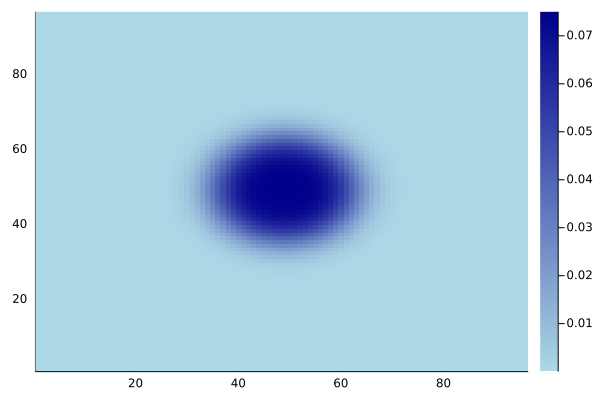

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))